In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

#stopwords para o idioma desejado
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aysla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aysla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [21]:
df = pd.read_csv('train.csv')

df

,text,label,language
0,wearing a fake engagement ring so guys won’t a...,1.8,English
1,Bees vs. Wasps. http,1.0,English
2,Here is a nice equation: 0+0-0-0+0=0,1.0,English
3,@user @user Enjoy each new day!😊🇨🇦🐞🐭,1.6,English
4,I can be having a perfectly good day then I th...,1.6,English
...,...,...,...
9486,若被確認為「國際關注公共衛生緊急事件」， 世衛會發布一系列包括確診、隔離和治療的詳細計畫， ...,1.0,Chinese
9487,@user 是嗎？ 可能我沒有注意到吧,2.0,Chinese
9488,@user @user 你剃过毛毛吗,3.8,Chinese
9489,@user 她没说是捐吧？,1.8,Chinese


In [22]:
stopwords_portugues = set(stopwords.words('portuguese'))

In [23]:
def preprocess_text(text):
    # Token do texto
    tokens = word_tokenize(text, language='portuguese')
    
    # Filtra os stopwords e caracteres indesejados
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stopwords_portugues and word.isalpha()]
    
    # Une as palavras novamente
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text

In [25]:
# Aplica a função de pré-processamento aos textos da coluna 'text'
df['texto_preprocessado'] = df['text'].apply(preprocess_text)

df


,text,label,language,texto_preprocessado
0,wearing a fake engagement ring so guys won’t a...,1.8,English,wearing fake engagement ring so guys won t app...
1,Bees vs. Wasps. http,1.0,English,bees wasps http
2,Here is a nice equation: 0+0-0-0+0=0,1.0,English,here is nice equation
3,@user @user Enjoy each new day!😊🇨🇦🐞🐭,1.6,English,user user enjoy each new day
4,I can be having a perfectly good day then I th...,1.6,English,i can be having perfectly good day then i thin...
...,...,...,...,...
9486,若被確認為「國際關注公共衛生緊急事件」， 世衛會發布一系列包括確診、隔離和治療的詳細計畫， ...,1.0,Chinese,http
9487,@user 是嗎？ 可能我沒有注意到吧,2.0,Chinese,user 可能我沒有注意到吧
9488,@user @user 你剃过毛毛吗,3.8,Chinese,user user 你剃过毛毛吗
9489,@user 她没说是捐吧？,1.8,Chinese,user


In [26]:
#Estatísticas descritivas
total_registros = len(df)
total_portugues = len(df[df['language'] == 'Portuguese'])
total_ingles = len(df[df['language'] == 'English'])
total_chines = len(df[df['language'] == 'Chinese'])

In [27]:
# Nuvem de palavras para o idioma português
texto_portugues = ' '.join(df[df['language'] == 'Portuguese']['texto_preprocessado'])
wordcloud_portugues = WordCloud(width=800, height=400, background_color='white').generate(texto_portugues)


In [28]:
# Nuvem de palavras para o idioma inglês
texto_ingles = ' '.join(df[df['language'] == 'English']['texto_preprocessado'])
wordcloud_ingles = WordCloud(width=800, height=400, background_color='white').generate(texto_ingles)

In [29]:
# Nuvem de palavras para o idioma chinês
texto_chines = ' '.join(df[df['language'] == 'Chinese']['texto_preprocessado'])
wordcloud_chines = WordCloud(width=800, height=400, background_color='white').generate(texto_chines)

Total de registros: 9491
Total em Português: 1596
Total em Inglês: 1587
Total em Chinês: 1596


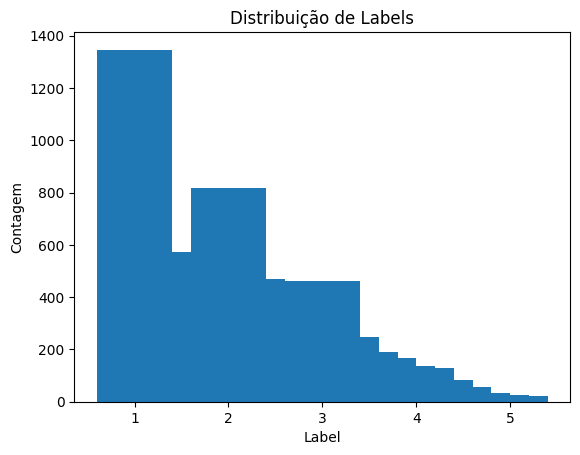

In [33]:
# Gráfico de distribuição de labels
labels = df['label']
label_counts = Counter(labels)
labels_unique = list(label_counts.keys())
labels_counts = list(label_counts.values())

plt.bar(labels_unique, labels_counts)
plt.xlabel('Label')
plt.ylabel('Contagem')
plt.title('Distribuição de Labels')

# Exibição dos resultados
print('Total de registros:', total_registros)
print('Total em Português:', total_portugues)
print('Total em Inglês:', total_ingles)
print('Total em Chinês:', total_chines)



(-0.5, 799.5, 399.5, -0.5)

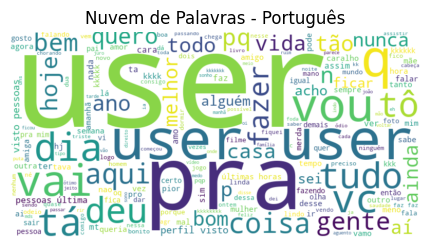

In [39]:
plt.figure(figsize=(18, 10))
plt.subplot(131)
plt.imshow(wordcloud_portugues, interpolation='bilinear')
plt.title('Nuvem de Palavras - Português')
plt.axis('off')



(-0.5, 799.5, 399.5, -0.5)

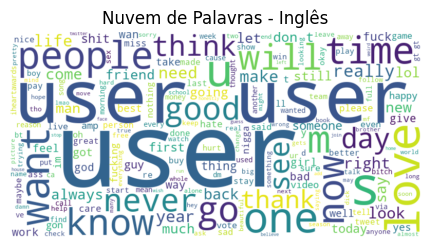

In [41]:

plt.figure(figsize=(18, 10))
plt.subplot(132)
plt.imshow(wordcloud_ingles, interpolation='bilinear')
plt.title('Nuvem de Palavras - Inglês')
plt.axis('off')



<module 'matplotlib.pyplot' from 'c:\\Users\\aysla\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

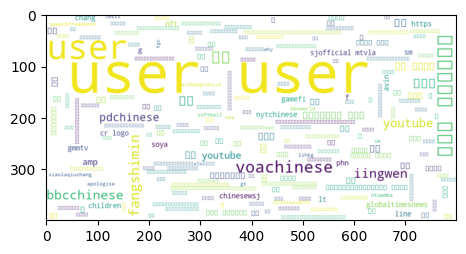

In [43]:
plt.figure(figsize=(18,10))
plt.subplot(133)
plt.imshow(wordcloud_chines, interpolation='bilinear')
plt